In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis

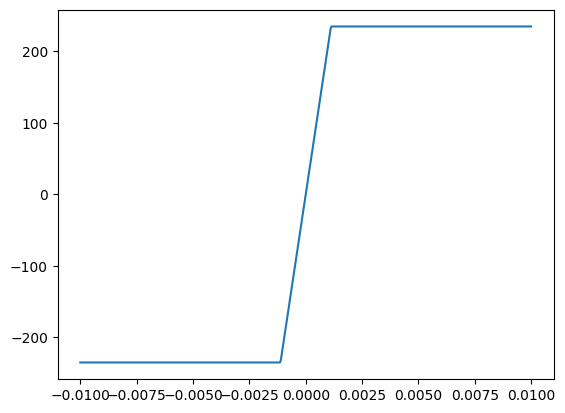

In [2]:
steel = material.Steel_S235()

strains = np.linspace(-0.01, 0.01, 500)
stresses = [steel.get_stress(strain) for strain in strains]

plt.plot(strains, stresses)
plt.show()

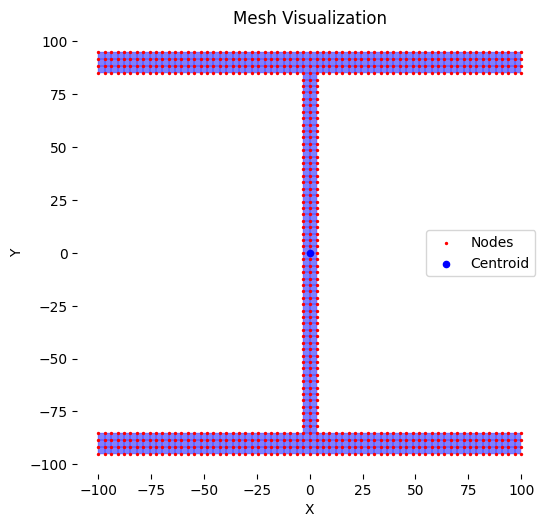

╒════════════════════╤═══════════════╕
│ Mesh Type          │ quadrilateral │
├────────────────────┼───────────────┤
│ Number of elements │ 508           │
├────────────────────┼───────────────┤
│ Number of nodes    │ 701           │
├────────────────────┼───────────────┤
│ Cross Section Area │ 5105.00       │
╘════════════════════╧═══════════════╛
╒═══════════════════╤═════════════╤═════════════╕
│                   │           X │           Y │
╞═══════════════════╪═════════════╪═════════════╡
│ Centroid          │       -0.00 │        0.00 │
├───────────────────┼─────────────┼─────────────┤
│ Moment of inertia │ 35094541.67 │ 13337223.85 │
╘═══════════════════╧═════════════╧═════════════╛


In [3]:
H    = geometry.H_beam(web_width     =   6.5,
                       web_height    = 170.0,
                       flange_width  = 200.0,
                       flange_height =  10.0)
Mesh = mesh.Mesh(H, "quadrilateral", 3)

Mesh.plot()
Mesh.print()

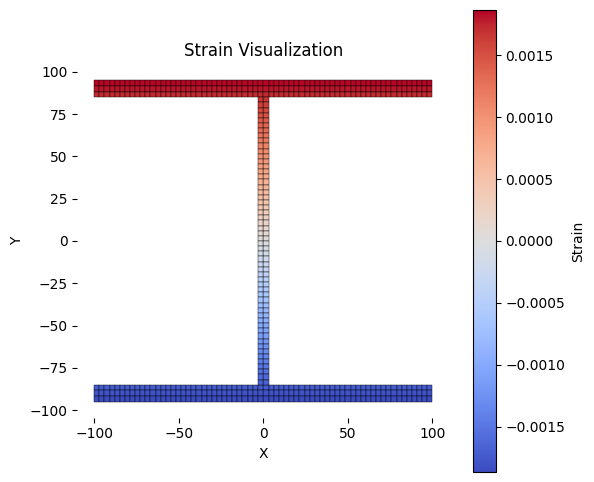

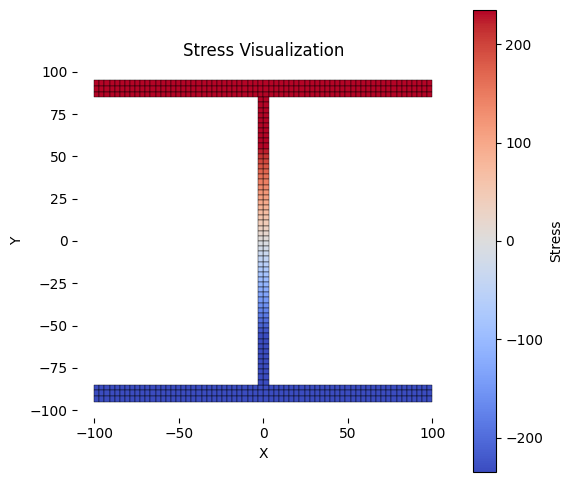

In [4]:
Analysis = stress_strain_analysis(Mesh)

Analysis.set_strain_and_curvature(0.00, 0.00002)

Analysis.calculate_strains()
Analysis.plot_strains()

Analysis.calculate_stresses()
Analysis.plot_stresses()

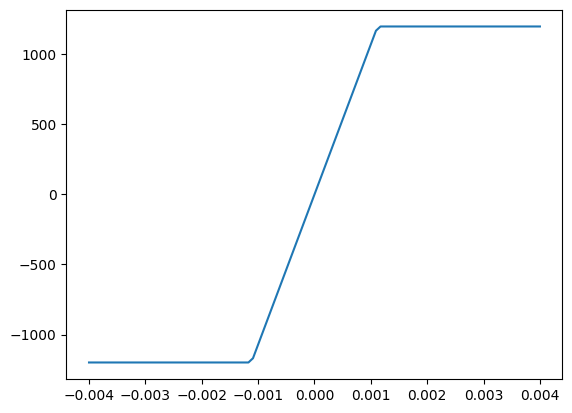

In [5]:
strains = np.linspace(-0.004, 0.004, 100)

Nx = []

for strain in strains:
    Analysis.set_strain_and_curvature(strain, 0)
    Analysis.calculate_strains()
    Analysis.calculate_stresses()
    Nx.append(Analysis.get_section_forces()[0])

plt.plot(strains, Nx)
plt.show()

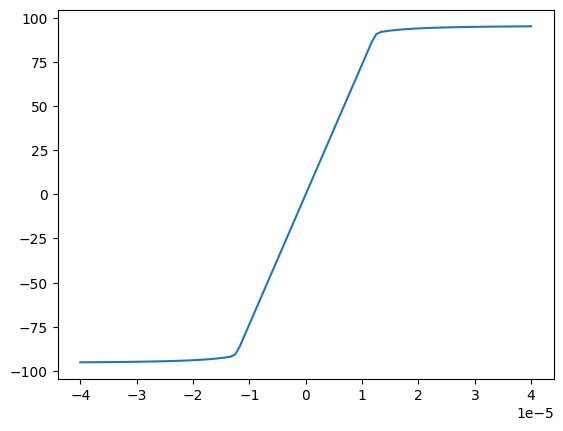

In [6]:
curvs = np.linspace(-0.00004, 0.00004, 100)

My = []

for curv in curvs:
    Analysis.set_strain_and_curvature(0, curv)
    Analysis.calculate_strains()
    Analysis.calculate_stresses()
    My.append(Analysis.get_section_forces()[1])

plt.plot(curvs, My)
plt.show()

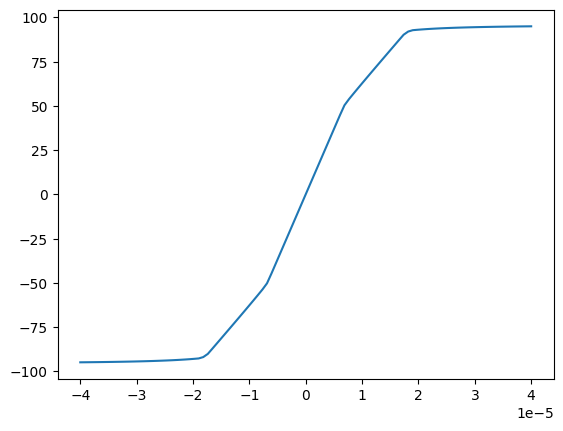

In [7]:
curvs = np.linspace(-0.00004, 0.00004, 100)

My = []

for curv in curvs:
    Analysis.set_strain_and_curvature(0.0005, curv)
    Analysis.calculate_strains()
    Analysis.calculate_stresses()
    My.append(Analysis.get_section_forces()[1])

plt.plot(curvs, My)
plt.show()

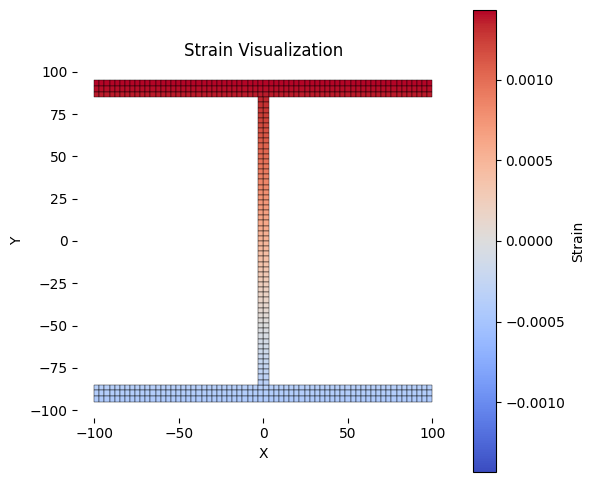

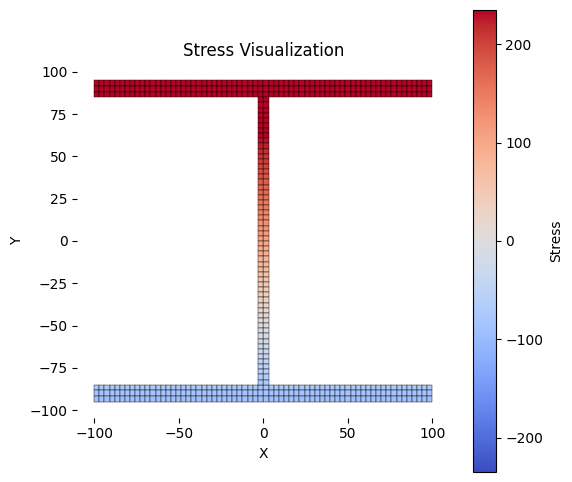

Nx =  414.39428571428414 kN
My =  62.75730455020546 kNm


In [8]:
Analysis.set_strain_and_curvature(0.0005, 0.00001)
Analysis.calculate_strains()
Analysis.calculate_stresses()
Analysis.plot_strains()
Analysis.plot_stresses()
print("Nx = ", Analysis.get_section_forces()[0], "kN")
print("My = ", Analysis.get_section_forces()[1], "kNm")